<a href="https://colab.research.google.com/github/plaban1981/Mitra_AI/blob/main/Basic_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('homeprices.csv')

In [3]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
%matplotlib inline

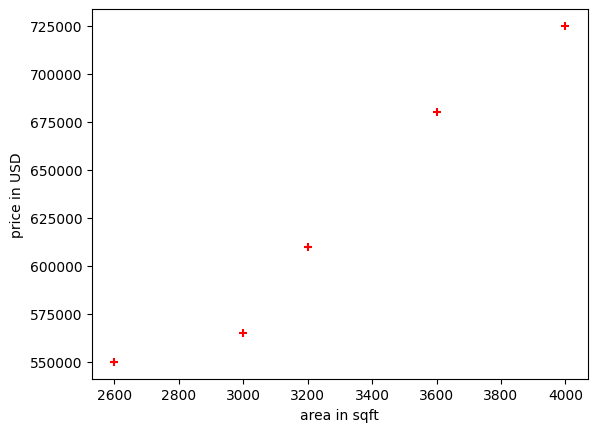

In [5]:
plt.xlabel('area in sqft')
plt.ylabel('price in USD')
plt.scatter(df.area,df.price,color='red',marker='+')

<Axes: xlabel='area', ylabel='price'>

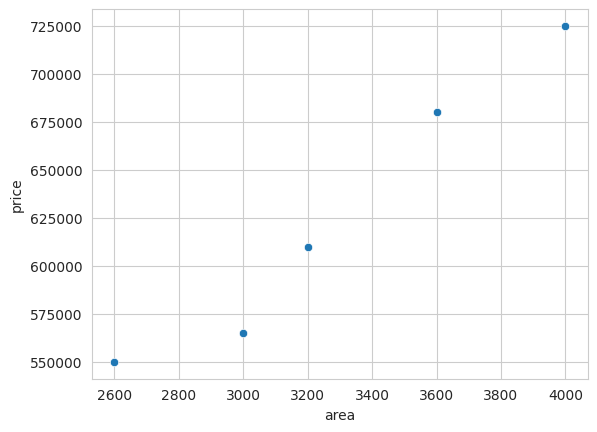

In [11]:
import seaborn as sns
sns.set_style('whitegrid')
sns.scatterplot(x= 'area',y='price',data=df)

In [12]:
new_df = df.drop('price',axis='columns')
# new_df
area = df.area.to_frame()
type(area)

pandas.core.frame.DataFrame

In [13]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [14]:
reg = linear_model.LinearRegression()
reg.fit(area,price)

LinearRegression()

In [15]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [16]:
reg.coef_

array([135.78767123])

In [17]:
reg.intercept_

180616.43835616432

### Y = m * X + b (m is coefficient and b is intercept)

In [18]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

In [19]:
# Predict price of a home with area = 5000 sqr ft
reg.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [20]:
a = np.array([2000,2500,3000])

In [21]:
a

array([2000, 2500, 3000])

In [22]:
areas = pd.DataFrame(a,columns=['area'])

In [23]:
areas

,area
0,2000
1,2500
2,3000


In [24]:
#predict for a whole set of houses
reg.predict(areas)

array([452191.78082192, 520085.61643836, 587979.45205479])

In [25]:
p = reg.predict(areas)
areas['prices'] = p
areas

,area,prices
0,2000,452191.780822
1,2500,520085.616438
2,3000,587979.452055


In [26]:
areas.to_csv('output.csv')

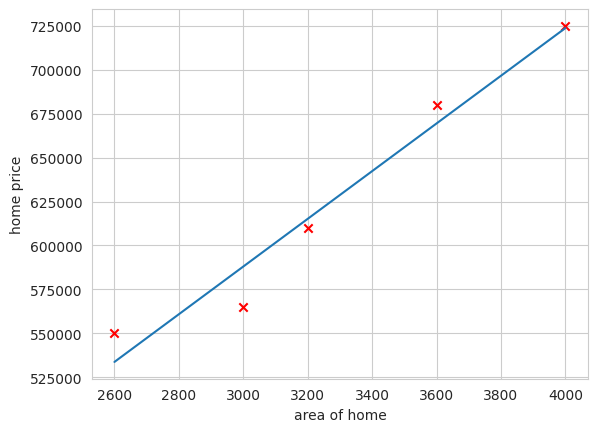

In [28]:
plt.xlabel('area of home')
plt.ylabel('home price')
plt.scatter(df.area,df.price,color='red',marker='x')
plt.plot(df.area,reg.predict(df[['area']]))
plt.show()